In [1]:
import os
from numpy import array
import pandas as pd
import numpy as np
import statsmodels as sms
df1 = pd.read_csv("death_malevsfemale.csv", low_memory=False)
print(f"Data frame is {df1.shape[0]:,} x {df1.shape[1]}")
%matplotlib inline
import matplotlib.pyplot as plt
#df.columns = ['local_authority_area', 'cases_total_2008', 'cases_total_2013', 'cases_total_2018',
#        'pop_total_2008', 'pop_total_2013', 'pop_total_2018', 'cases_male_2008', 'cases_male_2013', 'cases_male_2018',
 #       'pop_male_2008', 'pop_male_2013', 'pop_male_2018', 'cases_female_2008', 'cases_female_2013', 'cases_female_2018', 
  #      'pop_female_2008', 'pop_female_2013', 'pop_female_2018', 'total_budget', 'clean_air', 'clean_environ', 
   #     'health_training', 'school_awareness', 'media_awareness', 'sub_counselling', 'totalbudget_perp', 'clean_air_perp', 
    #    'clean_environ_perp', 'health_training_perp', 'school_awareness_perp', 'media_awareness_perp', 'sub_counselling_perp',
     #   'total_case_proportion', 'region', 'local_authority_type']

Data frame is 46 x 17


<AxesSubplot:ylabel='Frequency'>

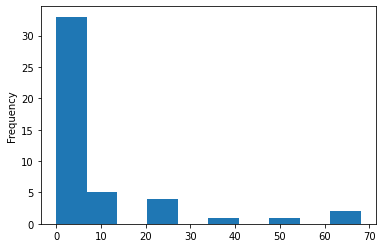

In [140]:
df1.male_15_44.plot.hist() # histogram

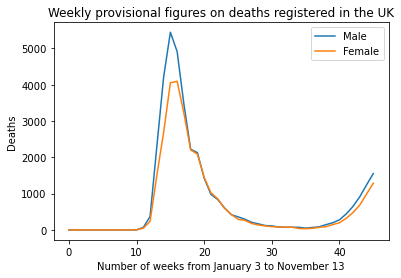

In [7]:
#fig, (ax1, ax2) = plt.subplots(2, 1)
#fig.suptitle('A tale of 2 subplots')
df1.male_total.plot(label='Male')
df1.female_total.plot(label='Female')
plt.xlabel("Number of weeks from January 3 to November 13")  
plt.ylabel("Deaths")
plt.title("Weekly provisional figures on deaths registered in the UK")
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Distribution of employment rate in 2018')

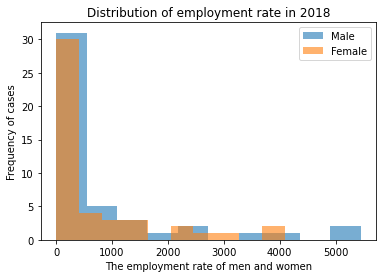

In [3]:
df1.male_total.plot.hist(label='Male', alpha=0.6)
df1.female_total.plot.hist(label='Female', alpha=0.6)
plt.legend(loc="upper right")
plt.xlabel("The employment rate of men and women")  
plt.ylabel("Frequency of cases")
plt.title("Distribution of employment rate in 2018")

In [7]:
from scipy import stats
stats.levene(df1.male_total,df1.female_total)

LeveneResult(statistic=0.2994884350197115, pvalue=0.5855578045417673)

In [8]:
tval,pval = stats.ttest_ind(df1.male_total, df1.female_total, equal_var = True)
print(tval,pval)

0.5560244197377012 0.5795738999315412


In [9]:
import scipy.stats as sps
KSstat, pval = sps.ks_2samp(df1.male_total, df1.female_total)
print(KSstat, pval)

0.08695652173913043 0.995862711499646


In [13]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [163]:
feature_cols = ['week']  
# use the list to select a subset of the original DataFrame  
X = df1[feature_cols]  
# equivalent command to do this in one line  
#c = df[['total_budget', 'clean_air', 'clean_environ', 
 #       'health_training', 'school_awareness', 'media_awareness', 'sub_counselling']]  
# print the first 5 rows  
print(X.head())  
# check the type and shape of c  
print(type(X))  
print(X.shape)  

   week
0     1
1     2
2     3
3     4
4     5
<class 'pandas.core.frame.DataFrame'>
(46, 1)


In [164]:
y = df1['male_total']  
# equivalent command that works if there are no spaces in the column name  
#y = data.Sales  
# print the first 5 values  
print(y.head()) 

0    0
1    0
2    0
3    0
4    0
Name: male_total, dtype: int64


In [165]:
from sklearn.model_selection import train_test_split  #这里是引用了交叉验证from sklearn.cross_validation import train_test_split  
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)  

In [166]:
print (X_train.shape)  
print (y_train.shape)
print (X_test.shape) 
print (y_test.shape) 

(34, 1)
(34,)
(12, 1)
(12,)


In [167]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print(model)
print(linreg.intercept_)
print(linreg.coef_)

LinearRegression()
1097.3378010038161
[-6.2055943]


In [175]:
y_pred = linreg.predict(1,50)
print(y_pred)

TypeError: predict() takes 2 positional arguments but 3 were given

In [152]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 484914.58


In [8]:
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_pred)),y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("Number of cases")  
plt.ylabel("Value of cases")  
plt.show()  

NameError: name 'y_pred' is not defined

<Figure size 432x288 with 0 Axes>

In [14]:
df1.index = pd.Index(sm.tsa.datetools.dates_from_range('2046','2091')) 
df1.male_total=np.array(df1.male_total,dtype=np.float)

<AxesSubplot:>

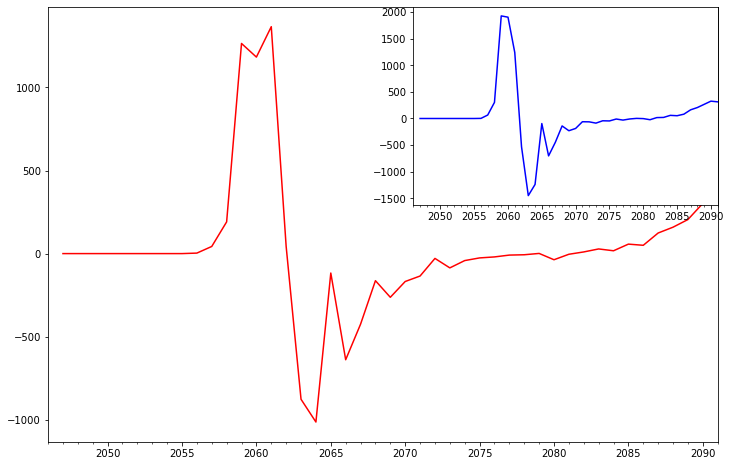

In [15]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
ax2= fig.add_subplot(222)
diff1 = df1.female_total.diff(1)
diff2 = df1.male_total.diff(1)
diff1.plot(ax=ax1,color = 'r')
diff2.plot(ax=ax2,color = 'b')

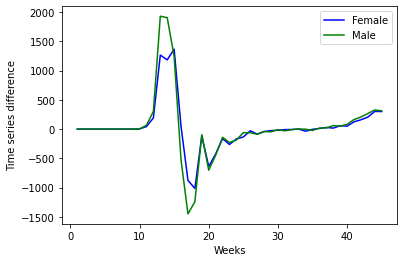

In [16]:
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(df1.week)),df1.female_total.diff(1),'b',label="Female")  
plt.plot(range(len(df1.week)),df1.male_total.diff(1),'g',label="Male")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("Weeks")  
plt.ylabel("Time series difference")  
plt.show()  

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


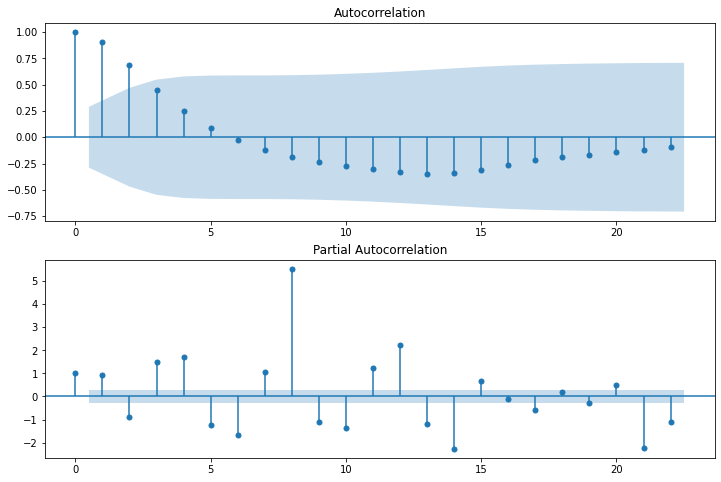

In [17]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.male_total,lags=22,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1.male_total,lags=22,ax=ax2)

In [18]:
arma_mod10 = sm.tsa.ARMA(df1.male_total,(1,0)).fit()
print(arma_mod10.aic,arma_mod10.bic,arma_mod10.hqic)
arma_mod01 = sm.tsa.ARMA(df1.male_total,(0,1)).fit()
print(arma_mod01.aic,arma_mod01.bic,arma_mod01.hqic)
arma_mod21 = sm.tsa.ARMA(df1.male_total,(2,1)).fit()
print(arma_mod21.aic,arma_mod21.bic,arma_mod21.hqic)
#arma_mod80 = sm.tsa.ARMA(df1.male_total,(,)).fit()
#print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferr

717.6310593330261 723.1169835224933 719.6861194140074
746.7160770942185 752.2020012836857 748.7711371751998
679.9850542978594 689.1282612803049 683.4101544328282


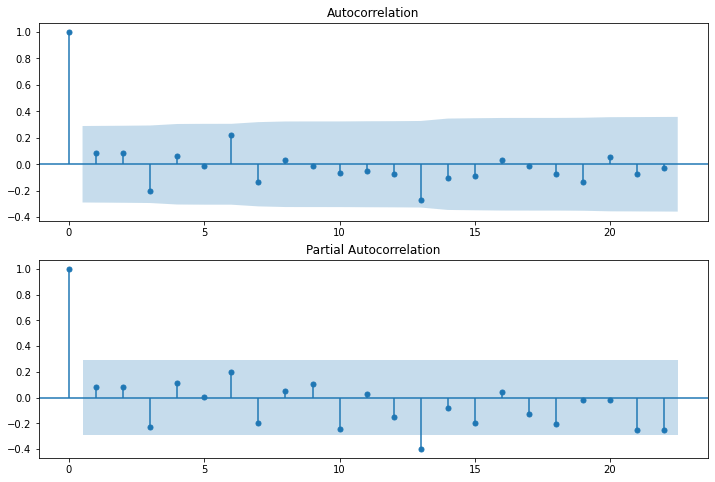

In [19]:
resid = arma_mod21.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=22, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=22, ax=ax2)
plt.show()

NormaltestResult(statistic=37.28683688192706, pvalue=8.003247493384378e-09)


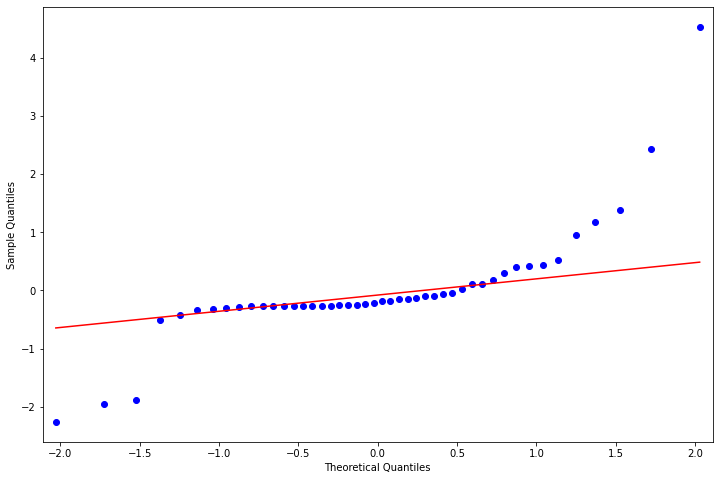

In [20]:
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
#plt.show()

In [21]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.084324   0.348892  0.554741
2.0   0.081964   0.686020  0.709631
3.0  -0.201071   2.762030  0.429789
4.0   0.066047   2.991357  0.559273
5.0  -0.015727   3.004676  0.699265
6.0   0.219123   5.655105  0.462912
7.0  -0.137402   6.723969  0.458175
8.0   0.033985   6.791078  0.559333
9.0  -0.013970   6.802725  0.657650
10.0 -0.069209   7.096503  0.716304
11.0 -0.050748   7.258970  0.777741
12.0 -0.076783   7.641842  0.812456
13.0 -0.270707  12.545080  0.483532
14.0 -0.102677  13.272523  0.505186
15.0 -0.091851  13.873428  0.535150
16.0  0.032219  13.949831  0.602451
17.0 -0.011948  13.960700  0.669882
18.0 -0.072911  14.379908  0.704011
19.0 -0.135720  15.886257  0.664853
20.0  0.057876  16.170718  0.705978
21.0 -0.074286  16.658103  0.731611
22.0 -0.029246  16.736793  0.777716
23.0  0.018815  16.770779  0.820346
24.0 -0.011397  16.783815  0.857735
25.0 -0.003006  16.784765  0.889452
26.0  0.024228  16.849568  0

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [22]:
predict_df1 = arma_mod21.predict(1,100)
print(predict_df1)
predict_df1.plt()

2047-12-31     73.949791
2048-12-31    129.387132
2049-12-31     99.090469
2050-12-31    106.758137
2051-12-31    104.011708
                 ...    
2142-12-31    818.725673
2143-12-31    818.722437
2144-12-31    818.719981
2145-12-31    818.718433
2146-12-31    818.717716
Freq: A-DEC, Length: 100, dtype: float64


AttributeError: 'Series' object has no attribute 'plt'

AttributeError: 'Series' object has no attribute 'sns'

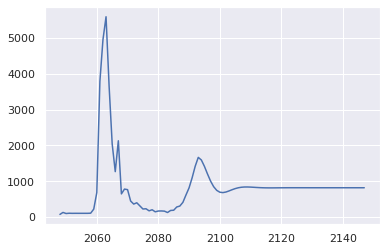

In [23]:
#fig, ax = plt.subplots(figsize=(12, 8))
#ax = df1.week['2046':].plot(ax=ax)
#fig = arma_mod21.plot_predict('2046', '2050', dynamic=True, ax=ax, plot_insample=False)
pred = predict_df1.astype(float)
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(data=pred)
pred.sns.axlabel("t","t2")

In [60]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
#def parser(x):
 #   return datetime.strptime('2020'+x,'%Y-%m')
 
series = read_csv('death_malevsfemale.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast()
yhat = output[0]
predictions.append(yhat)
obs = test[t]
history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                       

ValueError: endog is required to have ndim 1 but has ndim 2

In [155]:

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
 
%matplotlib inline  
 
# 显示数据趋势图
def draw_data(data):
    plt.figure()
    plt.plot(data)
    
with h5py.File('./taxi.h5', 'r') as hf:
    # 读取数据
    in_data=np.array(hf['in_data'])
    in_area = in_data.transpose(2, 0, 1)  # 调整维度
    in_mean_day = in_area.mean(axis=2)
    sub_data=pd.Series(in_mean_day[116][0:100])      # 截取数据集中的100个作为样本
    draw_data(sub_data)
    
    # 确定模型阶数
    # p,q=get_order(sub_data)
    # print('阶数：',p,q) 
    
    # 利用ARIMA模型进行预测
    model=ARIMA(sub_data,order=(5,1,5)).fit()        # 传入参数，构建并拟合模型
    predict_data=model.predict(0,150)                # 预测数据
    forecast=model.forecast(21)                      # 预测未来数据
    
    # 绘制原数据和预测数据对比图
    plt.plot(sub_data,label='原数据')
    plt.plot(predict_data,label='预测数据')
    plt.legend()
    plt.show()

ModuleNotFoundError: No module named 'h5py'